<h1>k-Nearest Neighbors (k-NN) Algorithm</h1>
<h1>Used for Both Classification and Regression Tasks</h1>
<p>
k-Nearest Neighbors (k-NN) is a non-parametric and lazy learning algorithm primarily used for classification and regression tasks. It works well on datasets that are balanced (equal representation of classes) and relatively noise-free.
</p>

<h2>How k-NN Works</h2>
<h3>1. Training Phase:</h3>
<p>Unlike other algorithms, k-NN does not explicitly learn a model during the training phase. It simply stores the training dataset.</p>

<h3>2. Prediction Phase:</h3>
<p>For a given test point, the algorithm:</p>
<ul>
    <li>Computes the distance between the test point and all points in the training dataset using a distance metric.</li>
    <li>Selects the <i>k</i> nearest neighbors (based on the computed distances).</li>
    <li>Assigns a class to the test point based on the majority class among the <i>k</i> neighbors (in classification) or computes the average value (in regression).</li>
</ul>

<h2>Key Steps in k-NN</h2>

<h3>1. Distance Metric</h3>
<p>k-NN relies heavily on a distance metric to identify the nearest neighbors. Commonly used metrics include:</p>
<ul>
    <li><strong>Euclidean Distance:</strong></li>
    <p>
        <img src="https://latex.codecogs.com/svg.latex?d(x,y)=\sqrt{\sum_{i=1}^{n}(x_i-y_i)^2}" />
    </p>
    <li><strong>Manhattan Distance:</strong></li>
    <p>
        <img src="https://latex.codecogs.com/svg.latex?d(x,y)=\sum_{i=1}^{n}|x_i-y_i|" />
    </p>
    <li><strong>Minkowski Distance (generalized form):</strong></li>
    <p>
        <img src="https://latex.codecogs.com/svg.latex?d(x,y)=\left(\sum_{i=1}^{n}|x_i-y_i|^p\right)^{\frac{1}{p}}" />
    </p>
    <p>where <i>p = 2</i> gives Euclidean distance, and <i>p = 1</i> gives Manhattan distance.</p>
</ul>

<h3>2. Choosing k (the Number of Neighbors)</h3>
<ul>
    <li>A small <i>k</i> may result in a model that is sensitive to noise (overfitting).</li>
    <li>A large <i>k</i> can lead to a model that is too smooth and overlooks local patterns (underfitting).</li>
    <li><strong>Common approaches to find the best k:</strong></li>
    <ul>
        <li>Use cross-validation to evaluate different <i>k</i> values.</li>
        <li>Plot the error rate (or accuracy) versus <i>k</i> to identify the optimal value.</li>
    </ul>
</ul>

<h3>3. Weighted Voting (Optional)</h3>
<p>Instead of giving equal weight to all neighbors, you can:</p>
<ul>
    <li>Assign higher weight to closer neighbors.</li>
    <li>Use weights based on the inverse of the distance:</li>
    <p>
        <img src="https://latex.codecogs.com/svg.latex?w=\frac{1}{d(x,y)}" />
    </p>
</ul>

<h3>4. Handling Ties in Voting</h3>
<p>If there is a tie in the majority voting, resolve it by:</p>
<ul>
    <li>Using the distance to the next nearest neighbor.</li>
    <li>Picking a class at random (less common).</li>
</ul>

<h2>Limitations of k-NN</h2>
<ul>
    <li><strong>Sensitive to Outliers:</strong> Outliers can skew the predictions, especially when they are close to the test point.</li>
    <li><strong>Inefficient for Large Datasets:</strong> The algorithm requires computing the distance to all training points for each test point, making it computationally expensive for large datasets.</li>
    <li><strong>Impact of Unbalanced Data:</strong> If one class dominates the dataset, the algorithm may disproportionately favor that class due to the majority voting mechanism.</li>
    <li><strong>Feature Scaling:</strong> Features with larger ranges can dominate distance calculations. Standardization or normalization is crucial.</li>
</ul>

<h2>Advantages of k-NN</h2>
<ul>
    <li><strong>Simple and Intuitive:</strong> Easy to understand and implement.</li>
    <li><strong>No Assumptions About Data Distribution:</strong> Non-parametric nature makes it flexible.</li>
    <li><strong>Versatility:</strong> Works for both classification and regression.</li>
    <li><strong>Adaptability:</strong> Can work with any distance metric suited for the problem.</li>
</ul>

<h2>Applications of k-NN</h2>
<ul>
    <li><strong>Classification:</strong></li>
    <ul>
        <li>Medical diagnosis: Identifying diseases based on patient features.</li>
        <li>Image recognition: Classifying objects in images.</li>
    </ul>
    <li><strong>Regression:</strong></li>
    <ul>
        <li>Predicting house prices based on features like size, location, etc.</li>
    </ul>
    <li><strong>Recommendation Systems:</strong></li>
    <ul>
        <li>Finding similar users or items based on feature similarity.</li>
    </ul>
</ul>

<h2>Improving k-NN</h2>
<ul>
    <li><strong>Dimensionality Reduction:</strong> Use techniques like PCA to reduce the number of features, improving computational efficiency.</li>
    <li><strong>Distance Metrics for Categorical Data:</strong> Use metrics like Hamming Distance for categorical variables.</li>
    <li><strong>Handling Imbalanced Data:</strong> Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) to balance classes.</li>
    <li><strong>KD-Trees and Ball Trees:</strong> For efficient neighbor searches in large datasets.</li>
</ul>

<h2>Conclusion</h2>
<p>
k-NN is a robust and versatile algorithm for both classification and regression tasks. While it is easy to implement and intuitive, its performance depends heavily on the choice of <i>k</i>, distance metric, and the quality of the dataset. Proper preprocessing, such as feature scaling and outlier removal, is crucial for success. Despite its simplicity, k-NN remains a valuable tool in the machine learning toolkit for specific scenarios.
</p>


In [1]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris #use your custom datasets as you wish
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Step 2: Load the dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target (0, 1, 2 representing the 3 flower species)

In [3]:

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [4]:
# Step 4: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:

# Step 5: Choose the number of neighbors (k) and initialize the k-NN classifier
k = 5 # You can tune this value later
knn = KNeighborsClassifier(n_neighbors=k)

In [43]:
# Step 6: Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [44]:
# Step 7: Make predictions on the test set
y_pred = knn.predict(X_test)

In [45]:
# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 91.11%


In [10]:
# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45



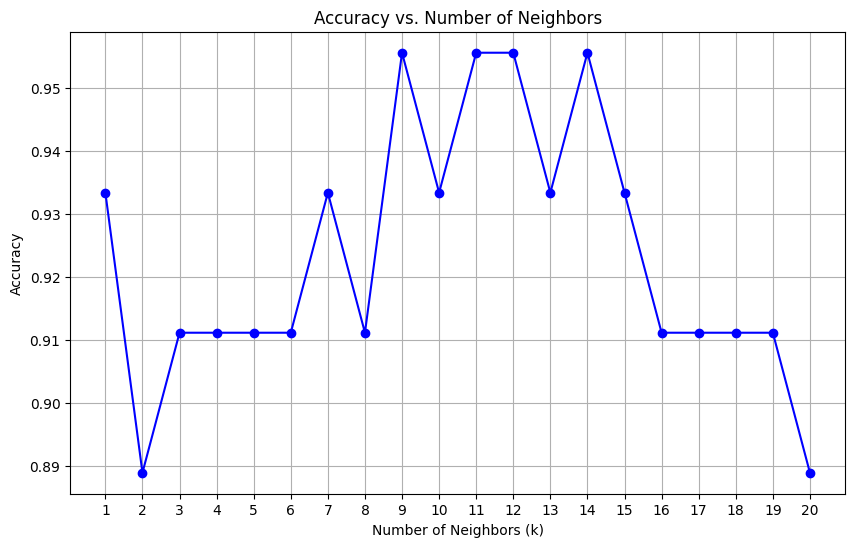

In [12]:
# Step 9: Visualize accuracy vs. different k values
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.xticks(k_values)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.grid()
plt.show()

In [48]:
k = 9 # from 9 k hit highest accuarcy or you can take lowest error k value by using error vs k value
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 95.56%

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



USING FOR REGRESSION TASK

In [61]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
# Generate a synthetic dataset
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)  # Random data points between 0 and 5
y = np.sin(X).ravel()  # Target values as the sine of the input data

In [63]:
# Initialize the KNN regressor with n_neighbors as 3
knn = KNeighborsRegressor(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=3)

In [64]:
# Make predictions on the test set
y_pred = knn.predict(X_test)


In [65]:
# Calculate the Mean Squared Error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.07407407407407407
R-squared: 0.8888888888888888


Let's plot both the true values and the predictions to visualize how well the model performs

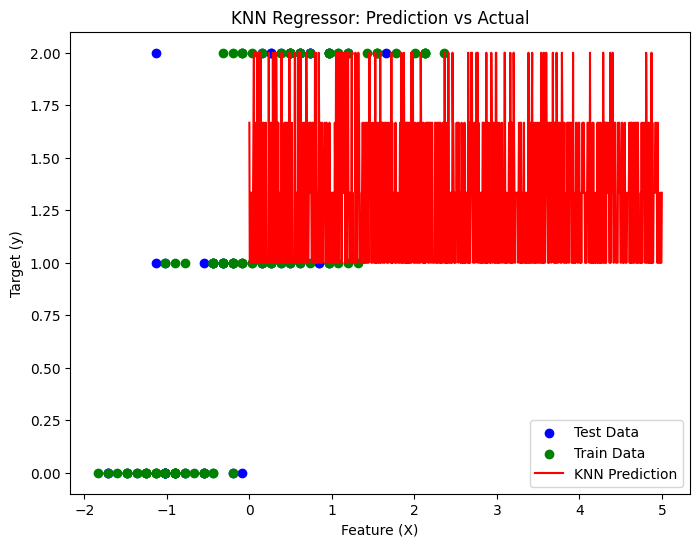

In [68]:
# Generate synthetic data for 4 features, as the model was trained with 4 features
X_range = np.random.rand(1000, 4)  # Random data with 4 features (to match the training data)
y_range = knn.predict(X_range)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Test Data')  # Assuming you're interested in the first feature for plotting
plt.scatter(X_train[:, 0], y_train, color='green', label='Train Data')  # Same here for train data
plt.plot(np.linspace(0, 5, 1000), y_range, color='red', label='KNN Prediction')
plt.title('KNN Regressor: Prediction vs Actual')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()


In [73]:
# Try with different k values
for k in [1, 3, 5, 7,8,9,10,11,12,13,14,15,16]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"K = {k}:")
    print(f"  MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"  R2: {r2_score(y_test, y_pred)}\n")



K = 1:
  MSE: 0.06666666666666667
  R2: 0.9

K = 3:
  MSE: 0.07407407407407407
  R2: 0.8888888888888888

K = 5:
  MSE: 0.053333333333333344
  R2: 0.9199999999999999

K = 7:
  MSE: 0.04852607709750567
  R2: 0.9272108843537414

K = 8:
  MSE: 0.04895833333333333
  R2: 0.9265625

K = 9:
  MSE: 0.05020576131687243
  R2: 0.9246913580246914

K = 10:
  MSE: 0.04977777777777778
  R2: 0.9253333333333333

K = 11:
  MSE: 0.049586776859504134
  R2: 0.9256198347107438

K = 12:
  MSE: 0.05447530864197532
  R2: 0.9182870370370371

K = 13:
  MSE: 0.053911900065746206
  R2: 0.9191321499013807

K = 14:
  MSE: 0.054308390022675734
  R2: 0.9185374149659864

K = 15:
  MSE: 0.05807407407407406
  R2: 0.9128888888888889

K = 16:
  MSE: 0.06032986111111111
  R2: 0.9095052083333334



In [75]:
# Initialize the KNN regressor with n_neighbors as 7 as it has low mse
knn = KNeighborsRegressor(n_neighbors=7)

# Train the model
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mse= mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Try with different k values
for k in [1, 3, 5, 7]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"K = {k}:")
    print(f"  MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"  R2: {r2_score(y_test, y_pred)}\n")

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Mean Squared Error: 0.04852607709750567
R-squared: 0.9272108843537414
